![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

In [1]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 730.2 kB/s eta 0:00:14
   - -------------------------------------- 0.5/10.7 MB 730.2 kB/s eta 0:00:14
   - -------------------------------------- 0.5/10.7 MB 730.2 kB/s eta 0:00:14
   - -------------------------------------- 0.5/10.7 MB 730.2 kB/s eta 0:00:14
   - -------------------------------------- 0.5/10.7 MB 730.2 kB/s eta 0:00:14
   - -------------------------------------- 0.5/10.7 MB 730.2 kB/s eta 0:00:14
   -- ------------------------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orange3 3.36.2 requires scikit-learn!=1.2.*,<1.4,>=1.1.0, but you have scikit-learn 1.7.0 which is incompatible.


In [13]:
# reading dataset
chronic_df = pd.read_csv('kidney_disease.csv')
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class	
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years
- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)
-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)
- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)
- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)
- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)
- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)
- 	10.Blood Glucose Random(numerical)		
		  bgr in mgs/dl
- 	11.Blood Urea(numerical)	
		  bu in mgs/dl
- 	12.Serum Creatinine(numerical)	
		  sc in mgs/dl
- 	13.Sodium(numerical)
		  sod in mEq/L
- 	14.Potassium(numerical)	
		  pot in mEq/L
- 	15.Hemoglobin(numerical)
		  hemo in gms
- 	16.Packed  Cell Volume(numerical)
- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm
- 	18.Red Blood Cell Count(numerical)	
		  rc in millions/cmm
- 	19.Hypertension(nominal)	
		  htn - (yes,no)
- 	20.Diabetes Mellitus(nominal)	
		  dm - (yes,no)
- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)
- 	22.Appetite(nominal)	
	    appet - (good,poor)
- 	23.Pedal Edema(nominal)
		  pe - (yes,no)	
- 	24.Anemia(nominal)
		  ane - (yes,no)
- 	25.Class (nominal)		
		  class - (ckd,notckd)

In [16]:
# checking info of columns and null values
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## **`Data Cleaning`**

In [19]:
# drop id column
chronic_df = chronic_df.drop('id',axis =1)
# Axis = 0 => rows
# Axis = 1 => columns


In [21]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [23]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [27]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical
chronic_df[['specific_gravity','albumin','sugar']]=chronic_df[['specific_gravity','albumin','sugar']].astype('object')



In [37]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
chronic_df['packed_cell_volume'] = pd.to_numeric(chronic_df['packed_cell_volume'],errors='coerce')
# coerce will replace all non-numeric values with Nan
chronic_df['white_blood_cell_count'] = pd.to_numeric(chronic_df['white_blood_cell_count'],errors='coerce')
chronic_df['red_blood_cell_count'] = pd.to_numeric(chronic_df['red_blood_cell_count'],errors='coerce')

In [31]:
# Extracting categorical and numerical columns

cat_cols = [col for col in chronic_df.columns if chronic_df[col].dtype =='object'] # category
num_cols = [col for col in chronic_df.columns if chronic_df[col].dtype != 'object'] # numerical


In [33]:
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [35]:
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin']

In [41]:
# by looping & looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {chronic_df[col].nunique()} and the vlaues are {chronic_df[col].unique()}")
    print()

specific_gravity has 5 and the vlaues are [1.02 1.01 1.005 1.015 nan 1.025]

albumin has 6 and the vlaues are [1.0 4.0 2.0 3.0 0.0 nan 5.0]

sugar has 6 and the vlaues are [0.0 3.0 4.0 1.0 nan 2.0 5.0]

red_blood_cells has 2 and the vlaues are [nan 'normal' 'abnormal']

pus_cell has 2 and the vlaues are ['normal' 'abnormal' nan]

pus_cell_clumps has 2 and the vlaues are ['notpresent' 'present' nan]

bacteria has 2 and the vlaues are ['notpresent' 'present' nan]

packed_cell_volume has 44 and the vlaues are ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']

white_blood_cell_count has 92 and the vlaues are ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '850

In [43]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
chronic_df['diabetes_mellitus'].replace({' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)
chronic_df['coronary_artery_disease'].replace({'\tno' :'no'},inplace = True)
chronic_df['class'].replace({'ckd\t':'ckd'},inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15264\2626379054.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chronic_df['diabetes_mellitus'].replace({' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_15264\2626379054.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [45]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)
chronic_df['class'] = chronic_df['class'].replace({'ckd':0, 'notckd':1})

# coverting target col into numeric to check correlation
chronic_df['class'] = pd.to_numeric(chronic_df['class'],errors = 'coerce')


C:\Users\hp\AppData\Local\Temp\ipykernel_15264\2152941394.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chronic_df['class'] = chronic_df['class'].replace({'ckd':0, 'notckd':1})


In [47]:
chronic_df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,1


In [49]:
# let's see the cols in numerical col list
num_cols


['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin']

## **`EDA`** Exploratory Data Analysis

<Figure size 2000x1200 with 0 Axes>

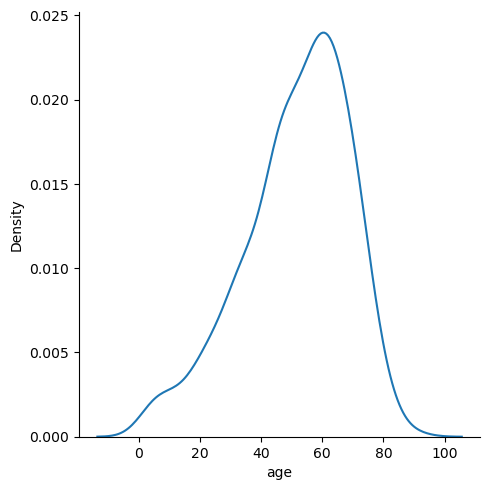

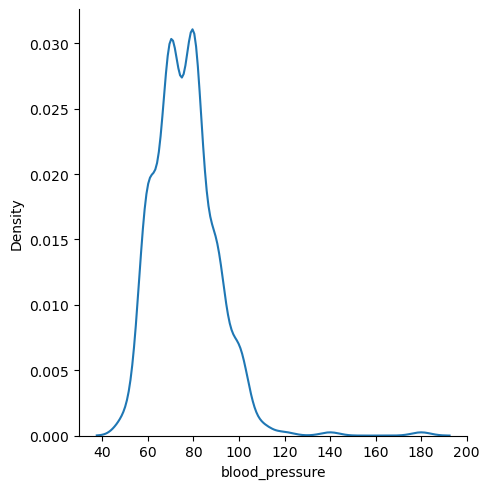

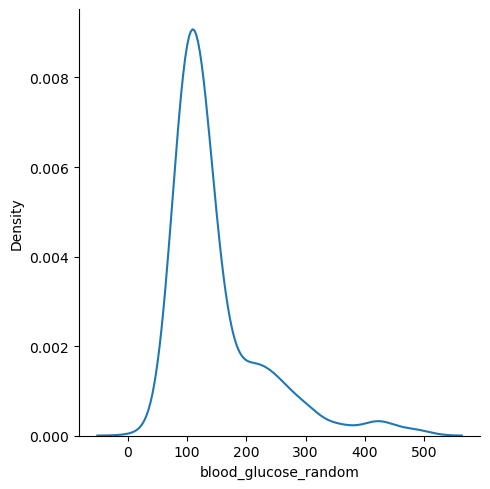

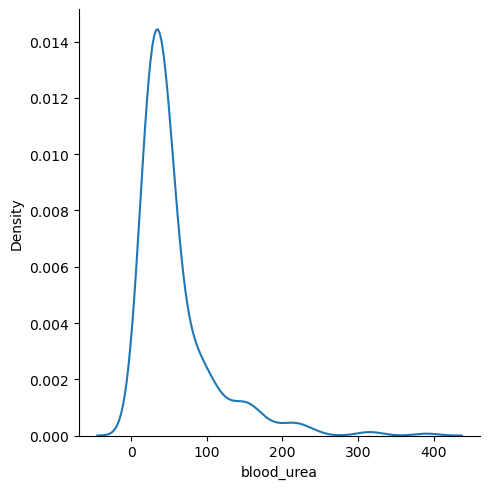

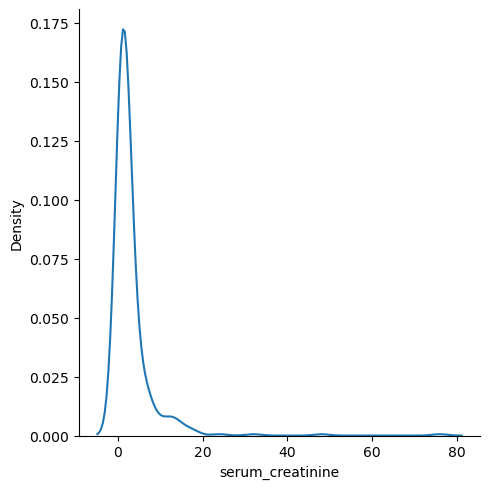

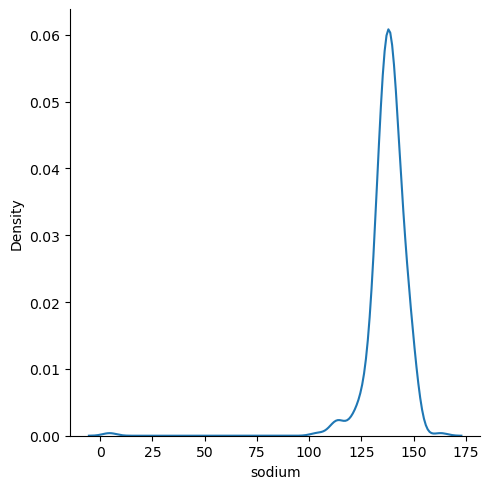

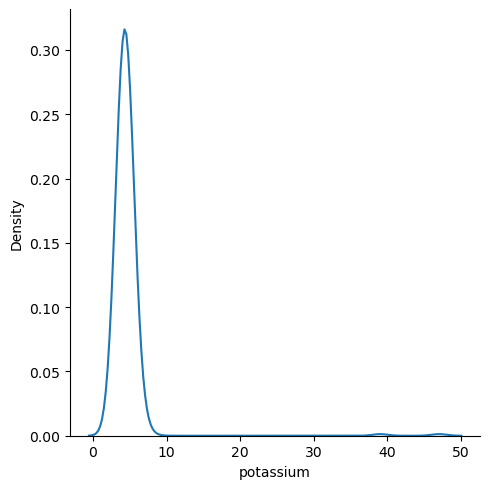

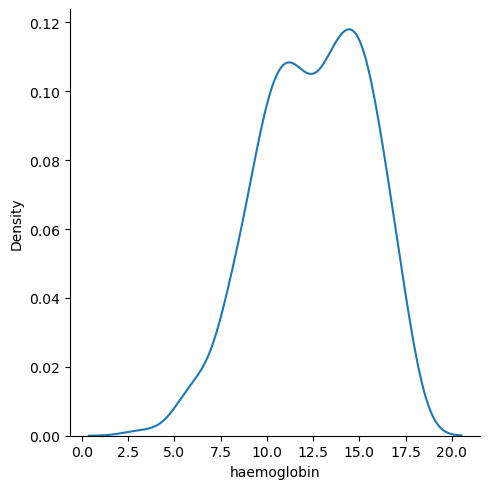

In [52]:
# checking numerical features distribution


plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution
for col in num_cols:
    sns.displot(chronic_df[col], kind = 'kde')



In [57]:
# let's see the cols in cat col list
cat_cols


['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

C:\Users\hp\AppData\Local\Temp\ipykernel_15264\2706803188.py:14: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_15264\2706803188.py:14: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


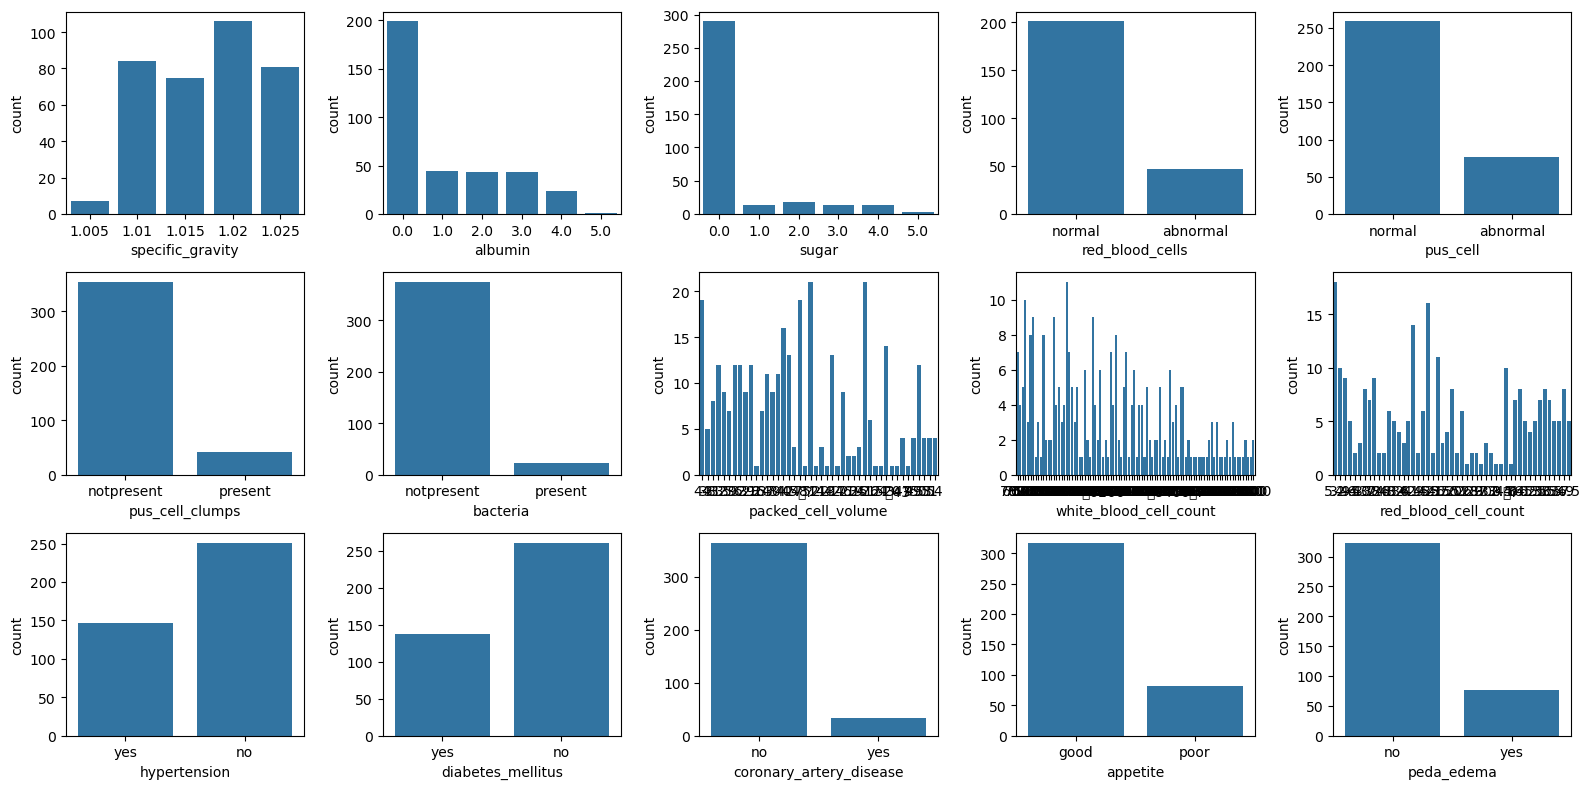

In [54]:
# checking cat features distribution

# create the figure and axes

fig, axes = plt.subplots(3, 5, figsize=(16,8))


axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot
for col,ax in zip(cat_cols,axes):
    sns.countplot(data = chronic_df, x = col, ax =ax)
    plt.xlabel(col)
    fig.tight_layout()

In [56]:
# let's check count of null values in whole df
chronic_df.isna().sum().sort_values(ascending = False)



red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [58]:
# let's check count of null values in num_cols
chronic_df[num_cols].isna().sum()


age                      9
blood_pressure          12
blood_glucose_random    44
blood_urea              19
serum_creatinine        17
sodium                  87
potassium               88
haemoglobin             52
dtype: int64

In [60]:
# let's check count of null values in cat cols
chronic_df[cat_cols].isna().sum()



specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

## **`Missing Value Treatment`**

In [64]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

# creating func for imputing random values
def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isna().sum())
    random_sample.index = chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample
    
# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [66]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)
    

In [70]:
# let's check count of null values in num_cols again
chronic_df[num_cols].isna().sum().sort_values(ascending=True)


age                     0
blood_pressure          0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
haemoglobin             0
dtype: int64

In [72]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

In [74]:
# let's check count of null values in cat_cols again
chronic_df[cat_cols].isna().sum().sort_values(ascending = False)


red_blood_cell_count       130
white_blood_cell_count     105
packed_cell_volume          70
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
pus_cell                     0
red_blood_cells              0
class                        0
dtype: int64

In [76]:
# filling cat null values with mode treatment
for col in cat_cols:
    impute_mode(col)

C:\Users\hp\AppData\Local\Temp\ipykernel_15264\804247255.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chronic_df[feature] = chronic_df[feature].fillna(mode)


In [78]:
# checjking the head of df
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,150.0,...,38,6000,5.2,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,0


In [80]:
# check unique values in each cat col by looping over cat cols
for col in cat_cols:
    print(f"{col} has {chronic_df[col].unique()} categories")
    print()


specific_gravity has [1.02  1.01  1.005 1.015 1.025] categories

albumin has [1. 4. 2. 3. 0. 5.] categories

sugar has [0. 3. 4. 1. 2. 5.] categories

red_blood_cells has ['normal' 'abnormal'] categories

pus_cell has ['normal' 'abnormal'] categories

pus_cell_clumps has ['notpresent' 'present'] categories

bacteria has ['notpresent' 'present'] categories

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '41' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46'
 '23' '19' '25' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] categories

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' 

In [85]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[3:]:
    chronic_df[col] =le.fit_transform(chronic_df[col])

ImportError: cannot import name '_yeojohnson_lambda' from 'sklearn.utils.fixes' (C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\fixes.py)

In [87]:
# check chronic df after transforming cat cols
chronic_df.head()




,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,150.0,...,38,6000,5.2,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,0


In [89]:
# Split data into features and target variables (X and y)
X = chronic_df.drop('class', axis =1)
y = chronic_df['class']

In [91]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0) 

## **`Model Building`**

In [96]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

print(f"Training accuracy of dtc is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing accuracy of dtc is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix: {confusion_matrix(y_test, dtc.predict(X_test))}")
print(f"Classification Report: {classification_report(y_test, dtc.predict(X_test))}")


0.9916666666666667
Training accuracy of dtc is 1.0
Testing accuracy of dtc is 0.9916666666666667
Confusion Matrix: [[72  0]
 [ 1 47]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [97]:
# hyper parameter tuning of decision tree , import GridSearchCV

from sklearn.model_selection import GridSearchCV

grid_param ={
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

          
# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = 1, verbose = 1)

grid_search_dtc.fit(X_train, y_train)


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2800 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\u

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [100]:
# print best parameters and best score in grid search dtc
print(grid_search_dtc.best_params_)

print(grid_search_dtc.best_score_)


{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
0.9892857142857142


In [102]:
# storing best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test accuracy of Decision Tree Classifier is {dtc_acc}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, dtc.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, dtc.predict(X_test))}")


Training accuracy of Decision Tree Classifier is 0.9821428571428571
Test accuracy of Decision Tree Classifier is 0.9833333333333333

Confusion Matrix: 
 [[70  2]
 [ 0 48]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [104]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy' , max_depth = 11, max_features = None, min_samples_leaf = 2, min_samples_split = 3, 
                                n_estimators=130)
rd_clf.fit(X_train,y_train )


# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))


print(f"Training accuracy of Random Forest Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test accuracy of Random Forest Classifier is {rd_clf_acc}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, dtc.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, dtc.predict(X_test))}")




Training accuracy of Random Forest Classifier is 0.9821428571428571
Test accuracy of Random Forest Classifier is 0.975

Confusion Matrix: 
 [[70  2]
 [ 0 48]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [106]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test accuracy of Gradient Boosting Classifier is {gb_acc}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, gb.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, gb.predict(X_test))}")


Training accuracy of Gradient Boosting Classifier is 1.0
Test accuracy of Gradient Boosting Classifier is 1.0

Confusion Matrix: 
 [[72  0]
 [ 0 48]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [108]:
# using max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)


# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training accuracy of Gradient Bosting Classifier is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test accuracy of Gradient Boosting Classifier is {sgb_acc}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, sgb.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, sgb.predict(X_test))}")



Training accuracy of Gradient Bosting Classifier is 1.0
Test accuracy of Gradient Boosting Classifier is 0.9916666666666667

Confusion Matrix: 
 [[72  0]
 [ 1 47]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



pip uninstall xgboost

pip install catboost

In [114]:
# import CatBoostClassifier
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations = 10)
cat.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test accuracy of Cat Boost Classifier is {cat_acc}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, cat.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, cat.predict(X_test))}")


Learning rate set to 0.408198
0:	learn: 0.2846609	total: 144ms	remaining: 1.29s
1:	learn: 0.1606042	total: 149ms	remaining: 595ms
2:	learn: 0.0854276	total: 153ms	remaining: 358ms
3:	learn: 0.0605072	total: 158ms	remaining: 237ms
4:	learn: 0.0432365	total: 162ms	remaining: 162ms
5:	learn: 0.0371208	total: 167ms	remaining: 111ms
6:	learn: 0.0271129	total: 172ms	remaining: 73.7ms
7:	learn: 0.0213587	total: 176ms	remaining: 44.1ms
8:	learn: 0.0178666	total: 181ms	remaining: 20.1ms
9:	learn: 0.0143192	total: 185ms	remaining: 0us
Training accuracy of Cat Boost Classifier is 1.0
Test accuracy of Cat Boost Classifier is 1.0

Confusion Matrix: 
 [[72  0]
 [ 0 48]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00     

In [116]:
# import ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test accuracy of Extra Trees Classifier is {etc_acc}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, etc.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, etc.predict(X_test))}")


Training accuracy of Extra Trees Classifier is 1.0
Test accuracy of Extra Trees Classifier is 0.975

Confusion Matrix: 
 [[72  0]
 [ 3 45]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
pip install lightgbm

In [118]:
# import LGBMClassifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)


# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test accuracy of LGBM Classifier is {lgbm_acc}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, lgbm.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, lgbm.predict(X_test))}")


[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [119]:
# comparing all models accuracy by creating a df
models = pd.DataFrame({
    "Model":["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier",
             "Stochastic Gradient Boosting", "Cat Boost", "Extra Trees Classifier"],
    "Score" :[ dtc_acc, rd_clf_acc, gb_acc, sgb_acc, cat_acc, etc_acc]
})


models.sort_values(by= "Score", ascending =False)


,Model,Score
2,Gradient Boosting Classifier,1.000000
4,Cat Boost,1.000000
3,Stochastic Gradient Boosting,0.991667
0,Decision Tree Classifier,0.983333
1,Random Forest Classifier,0.975000
5,Extra Trees Classifier,0.975000


In [132]:
best_model = sgb
best_accuracy = sgb_acc

In [172]:
print(type(best_model))

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


In [142]:
best_model.predict(X_train, y_train)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [170]:
# Save the trained model to a pickle file
import pickle
with open('best_chronic_kidney_diseasemodel.pkl', 'wb') as f:
    pickle.dump(best_model, f)